## Now the goal is to create a line of best fit.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [2]:
filename = 'MN_data.txt'
lin_data = np.loadtxt(filename)

Xs, Ys, sigs = lin_data.T
# Xs are indep variable
# Ys are average measurments
# sigs are standared errors

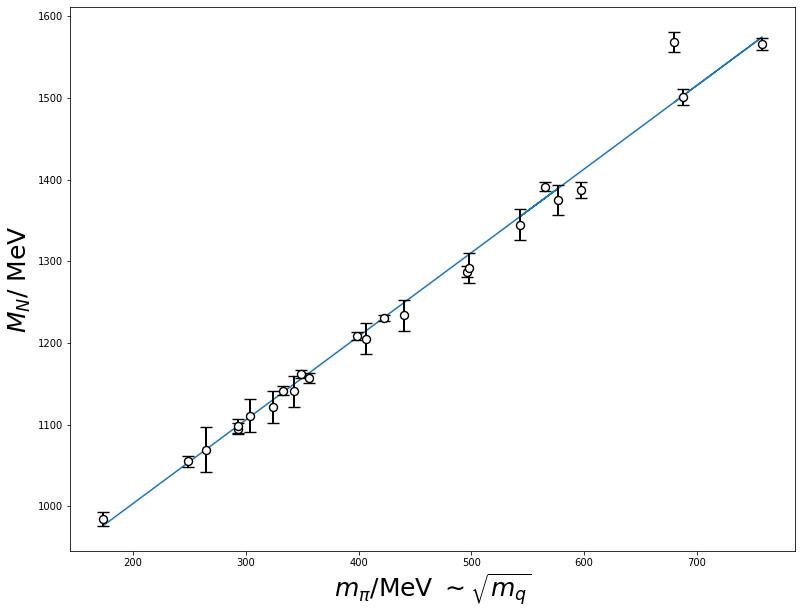

In [3]:
def chisq_lin(ab):
    # the chi-squared function for linear relationships
    # this will take an array in the form of [intercept, slope]
    
    a, b = ab # tokenize the array
    return np.sum(((Ys - (a+b*Xs))/sigs)**2)

def optimize_chisq():
    a_b_guess = [800,.1]
    
    guess_val = optimize.minimize(chisq_lin, a_b_guess, method = 'nelder-mead')
    return guess_val.x 

intercept, slope = optimize_chisq()

plt.figure(figsize=(13,10))

plt.errorbar(Xs, Ys, yerr= sigs, markersize=8,fmt='o',color='k',mfc='white',mec='k', elinewidth=2, capsize=6, mew=1.4,zorder=10)
plt.xlabel(r'$m_{\pi}$/MeV $\sim \sqrt{m_{q}}$', size = 25)
plt.ylabel(r'$M_{N} $/ MeV', size =25)
plt.plot(Xs, slope*Xs + intercept)